<a href="https://colab.research.google.com/github/Ardi2020/Ardi2020/blob/main/Studi_Kasus_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: Siapkan Peralatan (Import Library)**

Penjelasan: Langkah pertama dalam kode Python adalah mengimpor semua pustaka (libraries) yang kita perlukan.

**Poin Kunci:** Kita mengimpor tensorflow, keras (yang sekarang ada di dalam tensorflow), layers dari Keras, numpy, dan matplotlib.

In [2]:
# Import library utama TensorFlow
import tensorflow as tf

# Import Keras API dari TensorFlow
from tensorflow import keras
from tensorflow.keras import layers # Untuk mendefinisikan lapisan model

# Import NumPy untuk operasi numerik (walau mungkin tak banyak dipakai langsung di sini)
import numpy as np

# Import Matplotlib untuk membuat plot/visualisasi
import matplotlib.pyplot as plt

# Cetak versi TensorFlow (praktik yang baik)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


**Langkah 2: Dapatkan Bahan Baku (Muat Data MNIST)**

Penjelasan: Keras menyediakan cara super mudah untuk mengunduh dan memuat dataset populer seperti MNIST

P**oin Kunci:** Kita membagi data menjadi set training (untuk melatih model) dan set testing (untuk evaluasi akhir). x berisi gambar, y berisi label (angka sebenarnya).

In [3]:
# Langsung muat dataset MNIST dari Keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mari kita lihat bentuk (shape) datanya
print("Dimensi x_train:", x_train.shape)
# Output: (60000, 28, 28) -> 60rb gambar, masing2 28x28 pixel
print("Dimensi y_train:", y_train.shape)
# Output: (60000,) -> 60rb label (angka 0-9)
print("Dimensi x_test:", x_test.shape)
# Output: (10000, 28, 28)
print("Dimensi y_test:", y_test.shape)
# Output: (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dimensi x_train: (60000, 28, 28)
Dimensi y_train: (60000,)
Dimensi x_test: (10000, 28, 28)
Dimensi y_test: (10000,)


**Langkah 2: Bersihkan & Siapkan Bahan (Preprocessing)**

Penjelasan: Data mentah perlu diproses agar sesuai untuk dimasukkan ke model ANN.

**Kode (Visualisasi Singkat)**: (Opsional, tapi bagus)

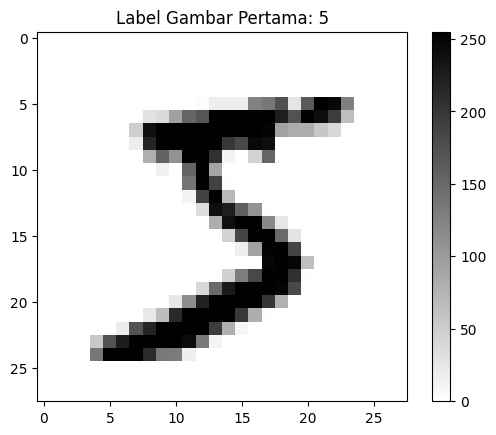

In [4]:
# Tampilkan contoh data pertama
plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary) # Tampilkan dalam grayscale
plt.title(f"Label Gambar Pertama: {y_train[0]}")
plt.colorbar()
plt.grid(False)
plt.show()

**Poin Kunci:** Normalisasi dan reshape adalah langkah preprocessing penting untuk dataset gambar ini saat menggunakan ANN dasar

**Kode (Preprocessing Utama):**

In [5]:
# 1. Normalisasi Nilai Piksel
# Ubah rentang nilai piksel dari [0, 255] menjadi [0, 1]
# Ini membantu proses training lebih stabil.
x_train = x_train / 255.0
x_test = x_test / 255.0

# 2. Reshape Input Data
# Model ANN sederhana (Dense layer) menerima input berupa vektor 1D.
# Kita ubah gambar 28x28 menjadi vektor 784 elemen (28 * 28 = 784).
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print("Dimensi x_train setelah reshape:", x_train.shape) # Output: (60000, 784)
print("Dimensi x_test setelah reshape:", x_test.shape)   # Output: (10000, 784)

# 3. (Opsional) One-Hot Encode Labels (y)
#    Contoh: angka 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#    Untuk loss 'categorical_crossentropy', ini wajib.
#    TAPI, kita akan pakai 'sparse_categorical_crossentropy'
#    yang bisa menerima label integer langsung, jadi langkah ini bisa dilewati.
# num_classes = 10
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

Dimensi x_train setelah reshape: (60000, 784)
Dimensi x_test setelah reshape: (10000, 784)


**Langkah 3: Rancang Bangunan (Bangun Arsitektur Model)**

**Penjelasan:** Kita gunakan Sequential API dari Keras untuk menumpuk lapisan-lapisan ANN secara berurutan.

**Input:** Vektor 784 elemen (hasil reshape gambar).

**Hidden Layer:** Satu lapisan Dense dengan aktivasi ReLU.

**Output Layer: **Satu lapisan Dense dengan 10 neuron (1 untuk tiap digit) dan aktivasi Softmax.

**Poin Kunci:** Perhatikan definisi lapisan Dense, jumlah neuron, fungsi aktivasi (relu, softmax), dan input_shape. model.summary() sangat berguna untuk memeriksa arsitektur.

In [6]:
model = keras.Sequential([
    # Lapisan pertama (Hidden Layer)
    layers.Dense(128, activation='relu', input_shape=(784,)),
    # 128 neuron, aktivasi ReLU.
    # 'input_shape=(784,)' WAJIB di lapisan pertama untuk
    # memberi tahu model bentuk input yang diharapkan.

    # Lapisan kedua (Output Layer)
    layers.Dense(10, activation='softmax')
    # 10 neuron (sesuai jumlah kelas 0-9).
    # Aktivasi Softmax menghasilkan distribusi probabilitas
    # untuk setiap kelas, cocok untuk klasifikasi multi-kelas.
])

# Tampilkan ringkasan arsitektur model
print("\nRingkasan Model:")
model.summary()


Ringkasan Model:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Langkah 4: Tentukan Aturan Main (Compile Model)**

**Penjelasan:** Sebelum melatih, kita perlu 'mengkompilasi' model, yaitu menentukan:

  * optimizer: * Algoritma yang digunakan untuk mengubah bobot (misal: Adam, SGD).
  * Loss function:* Cara mengukur seberapa salah prediksi model (misal: cross-entropy).
  * metrics:* Ukuran performa yang ingin dipantau (misal: akurasi).


**Poin Kunci:**

optimizer='adam': Optimizer Adam adalah pilihan default yang seringkali bagus.

loss='sparse_categorical_crossentropy': Loss function yang cocok jika label y kita masih berupa integer (0-9). Jika y sudah di one-hot encode, gunakan categorical_crossentropy.

metrics=['accuracy']: Kita ingin melihat akurasi model selama training dan evaluasi.

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Langkah 4: Proses Belajar (Training Model)**

**Penjelasan:** Ini adalah inti dari pembelajaran mesin. Kita "memberi makan" model dengan data training (x_train, y_train) agar ia belajar menyesuaikan bobotnya. Kita lakukan ini selama beberapa epoch.

**Poin Kunci:**

*model.fit():* Fungsi untuk memulai training.

*epochs:* Berapa kali seluruh dataset training diproses.

*batch_size:* Berapa banyak sampel yang diproses sebelum bobot diupdate.

*validation_split=0.2:* Penting untuk memonitor performa pada data yang tidak digunakan langsung untuk update bobot (membantu deteksi overfitting). Keras akan otomatis memisahkan 20% dari x_train & y_train untuk ini.

history: *italicised text* Menyimpan catatan loss & akurasi per epoch.

In [9]:
print("\nMemulai Proses Training...")

# Tentukan jumlah epoch dan batch size
EPOCHS = 10
BATCH_SIZE = 128

# Latih model!
history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_split=0.2) # Gunakan 20% data training untuk validasi

print("Training Selesai.")


Memulai Proses Training...
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8129 - loss: 0.6785 - val_accuracy: 0.9447 - val_loss: 0.2071
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9455 - loss: 0.1973 - val_accuracy: 0.9561 - val_loss: 0.1532
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9611 - loss: 0.1360 - val_accuracy: 0.9622 - val_loss: 0.1296
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9710 - loss: 0.1078 - val_accuracy: 0.9667 - val_loss: 0.1149
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9767 - loss: 0.0844 - val_accuracy: 0.9682 - val_loss: 0.1054
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9814 - loss: 0.0675 - val_accuracy: 0.9708 - val_loss: 0.0960
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0553 - val_accuracy: 0.9712 - val_loss: 0.0922
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9870 - lo

**Langkah 5: Ujian Akhir (Evaluasi Model)**

**Penjelasan:** Setelah dilatih, kita uji performa model pada data test yang belum pernah dilihat sama sekali.

**Poin Kunci: ** model.evaluate() memberikan skor loss dan akurasi (atau metrik lain yang ditentukan saat compile) pada data test. Ini adalah indikator utama seberapa baik model bisa generalisasi.

In [10]:
print("\nMengevaluasi model pada data test...")
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f'\nHasil Evaluasi Data Test:')
print(f' - Test Loss     : {test_loss:.4f}')
print(f' - Test Accuracy : {test_acc:.4f}')


Mengevaluasi model pada data test...
313/313 - 1s - 2ms/step - accuracy: 0.9752 - loss: 0.0797

Hasil Evaluasi Data Test:
 - Test Loss     : 0.0797
 - Test Accuracy : 0.9752


**Langkah 5: Menggunakan Model (Membuat Prediksi)**

**Penjelasan:** Model yang sudah dilatih kini bisa digunakan untuk memprediksi label dari data baru.

**Poin Kunci:** *model.predict()* menghasilkan output mentah (probabilitas). Kita gunakan *np.argmax()* untuk mendapatkan kelas final. Visualisasi membantu memahami bagaimana model memprediksi.

In [ ]:
# Dapatkan prediksi untuk seluruh data test
predictions = model.predict(x_test)

# Prediksi adalah probabilitas untuk setiap kelas (0-9)
print("\nContoh output prediksi (probabilitas) untuk gambar test pertama:")
print(predictions[0])

# Ambil kelas dengan probabilitas tertinggi sebagai hasil prediksi
predicted_class = np.argmax(predictions[0])
print(f"\nPrediksi kelas untuk gambar test pertama: {predicted_class}")
print(f"Label sebenarnya: {y_test[0]}")

# (Opsional) Visualisasi beberapa hasil prediksi
num_rows = 3
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Reshape kembali ke 28x28 untuk ditampilkan
  img_display = x_test[i].reshape(28, 28)
  plt.imshow(img_display, cmap='gray')
  plt.axis('off')
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plt.bar(range(10), predictions[i]) # Tampilkan probabilitas per kelas
  plt.xticks(range(10))
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions[i])
  color = 'green' if predicted_label == y_test[i] else 'red'
  plt.title(f"Pred: {predicted_label} (True: {y_test[i]})", color=color)
plt.tight_layout()
plt.show()

**Menganalisis Kurva Pembelajaran**

**Penjelasan:** Mem-plot loss dan akurasi pada data training vs data validasi selama epoch dapat memberi wawasan tentang proses belajar (misal: mendeteksi overfitting).

**Poin Kunci: **Idealnya, kurva training dan validasi bergerak beriringan. Jika kurva validasi mulai memburuk (loss naik, akurasi turun) sementara kurva training terus membaik, itu indikasi overfitting.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1) # Jumlah epoch

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

**Rangkuman Implementasi: Dari Data ke Model**

**Workflow Utama:**


1. Import libraries.
2. Load & Preprocess data (MNIST: load, normalize, reshape).
3. Build model arsitektur (Sequential, Dense layers).
4. Compile model (optimizer, loss, metrics)
5. Train model (fit dengan data training & validasi).
6. Evaluate model (evaluate dengan data test).
7. Predict (predict pada data baru).


**Pesan:** Dengan TensorFlow/Keras, kita bisa menerapkan konsep ANN untuk menyelesaikan masalah nyata dengan alur kerja yang terstruktur.
